In [1]:
import numpy as np
from qs_mps.utils import load_list_of_lists, tensor_shapes, create_sequential_colors, get_precision
from qs_mps.mps_class import MPS
import matplotlib.pyplot as plt
import matplotlib as mpl
%load_ext autoreload
%autoreload 2

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

# Fluxtube of the electric field

In [2]:
# initialize parameters
model = "Z2_dual"

path = "mac"
charges_x = [1,19]
charges_y = [3,3]
precision = 2
h_i = 0.5
h_f = 1.5
npoints = 50
interval = np.linspace(h_i,h_f,npoints)
L = 21
l = 6
chi = 16
endens, correl = True, False

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    if charges_x == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(charges_x)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f'/Users/fradm/Google Drive/My Drive/projects/{model_path}'
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [3]:
def compute_correlation_function_vacuum():
    corr_vacuum = []
    for h in interval:
        print(f"Correlator - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        corr = lattice_mps.connected_correlator(site=L//2, lad=3)
        corr_vacuum.append(corr)
    return corr_vacuum

def compute_electric_energy_density_vacuum():
    eed_vacuum = []
    for h in interval:
        print(f"Energy Density - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        eed = lattice_mps.electric_energy_density_Z2(site=L//2-1)
        eed_vacuum.append(eed)
    return eed_vacuum


def compute_correlation_function_charges():
    corr_charges = []
    for h in interval:
        print(f"Correlator - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
        corr = lattice_mps.connected_correlator(site=L//2, lad=3)
        corr_charges.append(corr)
    return corr_charges

def compute_electric_energy_density_charges():
    eed_charges = []
    for h in interval:
        print(f"Energy Density - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
        eed = lattice_mps.electric_energy_density_Z2(site=L//2-1)
        eed_charges.append(eed)
    return eed_charges

### Compute energy density and correlators

In [ ]:
if endens:
    # compute the connected electric energy density
    eed_charges = compute_electric_energy_density_charges()
    eed_vacuum = compute_electric_energy_density_vacuum()
    eed_conn = (np.array(eed_charges) - np.array(eed_vacuum))

if correl:
    # compute the connected correlation function
    corr_charges = compute_correlation_function_charges()
    corr_vacuum = compute_correlation_function_vacuum()
    corr_conn = (np.array(corr_charges) - np.array(corr_vacuum))


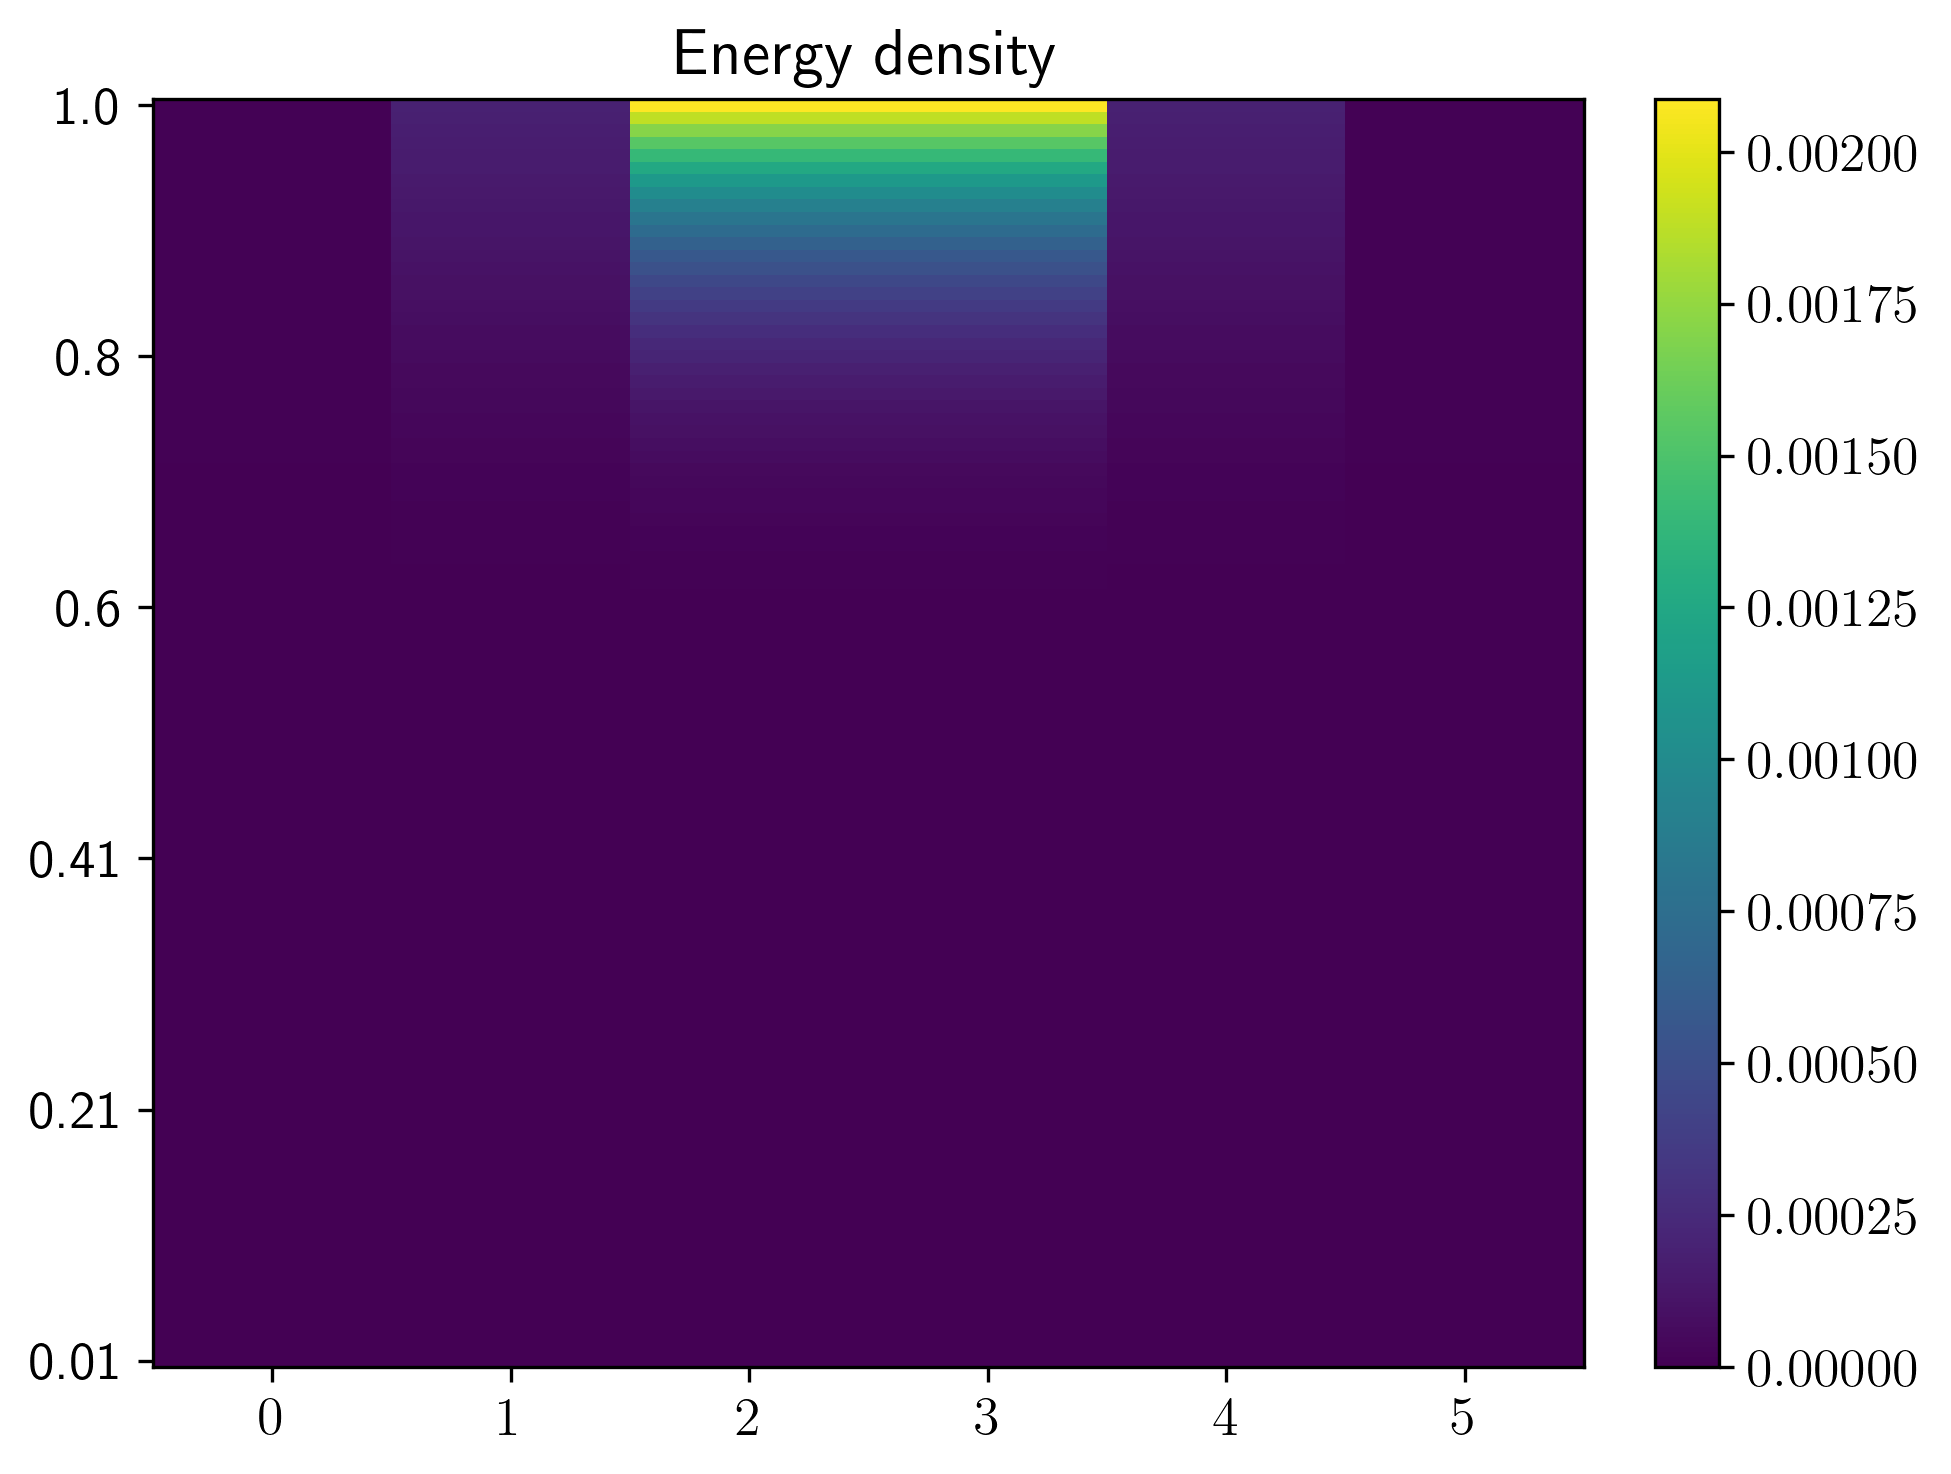

In [ ]:
plt.title(f"Energy density")
plt.imshow(eed_conn, aspect='auto', origin='lower') # , norm=mpl.colors.LogNorm()

# plt.title(f"Correlations")
# plt.imshow(corr_conn, aspect=0.1, origin='lower')

plt.yticks(ticks=np.linspace(0,100,101)[::(len(interval)//5)], labels=[round(h,2) for h in interval[::(len(interval)//5)]])
plt.colorbar()
# plt.savefig(f"{parent_path}/figures/correlators/correlator_{model}_direct_lattice_{l}x{L-1}_{sector}_{charges_x}-{charges_y}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.png")

## String width

We find the string width as follows

$$\sigma^2 = \frac{\sum_x x^2 \mathcal{E}(x)}{\sum_x \mathcal{E}(x)}$$

In [ ]:
# we find the string width as a normalized sum of the electric energy density for the position squared
eed_string = []
xs = [i for i in range(-l//2,l//2+1,) if i!=0]
for eed_lad in eed_conn:
    eed_sum_lad = 0
    for x, eed_x in zip(xs, eed_lad):
        eed_sum_lad += eed_x * ((x)**2)
    eed_sum_lad = eed_sum_lad / sum(eed_lad)
    eed_string.append(eed_sum_lad)


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_2119/3666645651.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.title("String width $\sigma^2$")


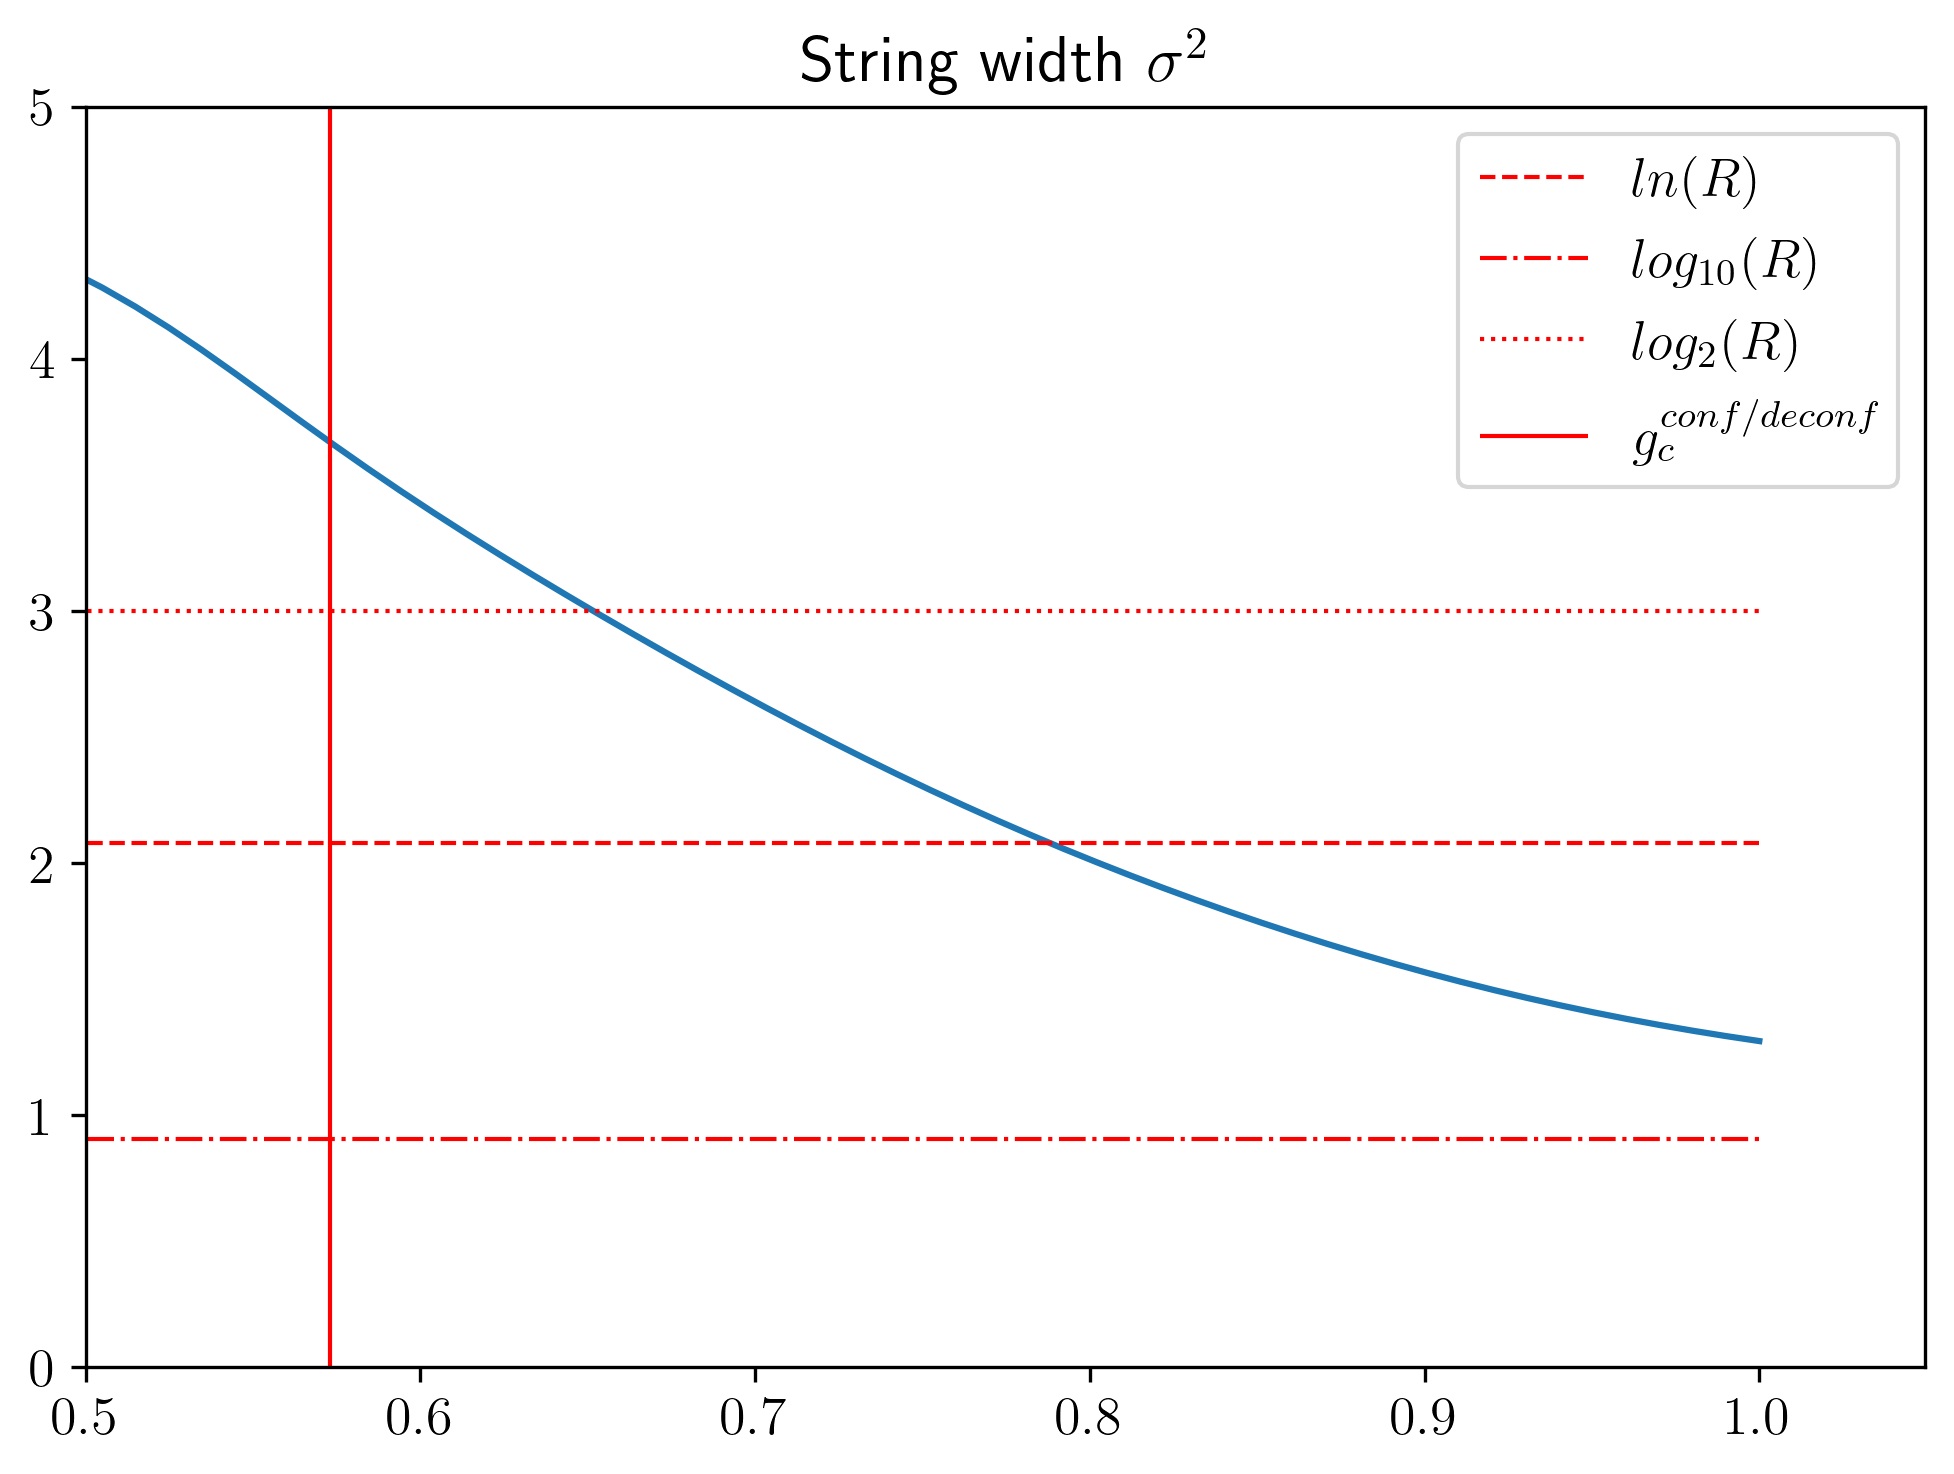

In [ ]:
plt.title("String width $\sigma^2$")
plt.plot(interval, eed_string)
d_string_dh = np.gradient(eed_string[50:], interval[50:])
idx_max = np.argmax(np.abs(d_string_dh))
x_val = interval[50:][idx_max]
# plt.plot(interval[50:],np.abs(d_string_dh), label='Derivative')
plt.hlines(y=np.log(L_string), xmin=np.min(interval), xmax=np.max(interval), linestyle='--', linewidth=1, color='r', label='$ln(R)$')
plt.hlines(y=np.log10(L_string), xmin=np.min(interval), xmax=np.max(interval), linestyle='-.', linewidth=1, color='r', label='$log_{10}(R)$')
plt.hlines(y=np.log2(L_string), xmin=np.min(interval), xmax=np.max(interval), linestyle=':', linewidth=1, color='r', label='$log_{2}(R)$')
plt.vlines(x=1/np.sqrt(3.044), ymin=0, ymax=5, linestyle='-', linewidth=1, color='r', label='$g_c^{conf/deconf}$')
plt.legend()
plt.xlim(left=0.5)
plt.ylim((0,5))
plt.savefig(f"{parent_path}/figures/energy_density/string_width_{model}_direct_lattice_{l}x{L-1}_{sector}_{charges_x}-{charges_y}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.png")
plt.show()


## Decay of Correlators or Energy Density

In [11]:
if endens:
    half_eed = eed_conn[:,:l//2]
if correl:
    half_corr = corr_conn[:,:l//2]

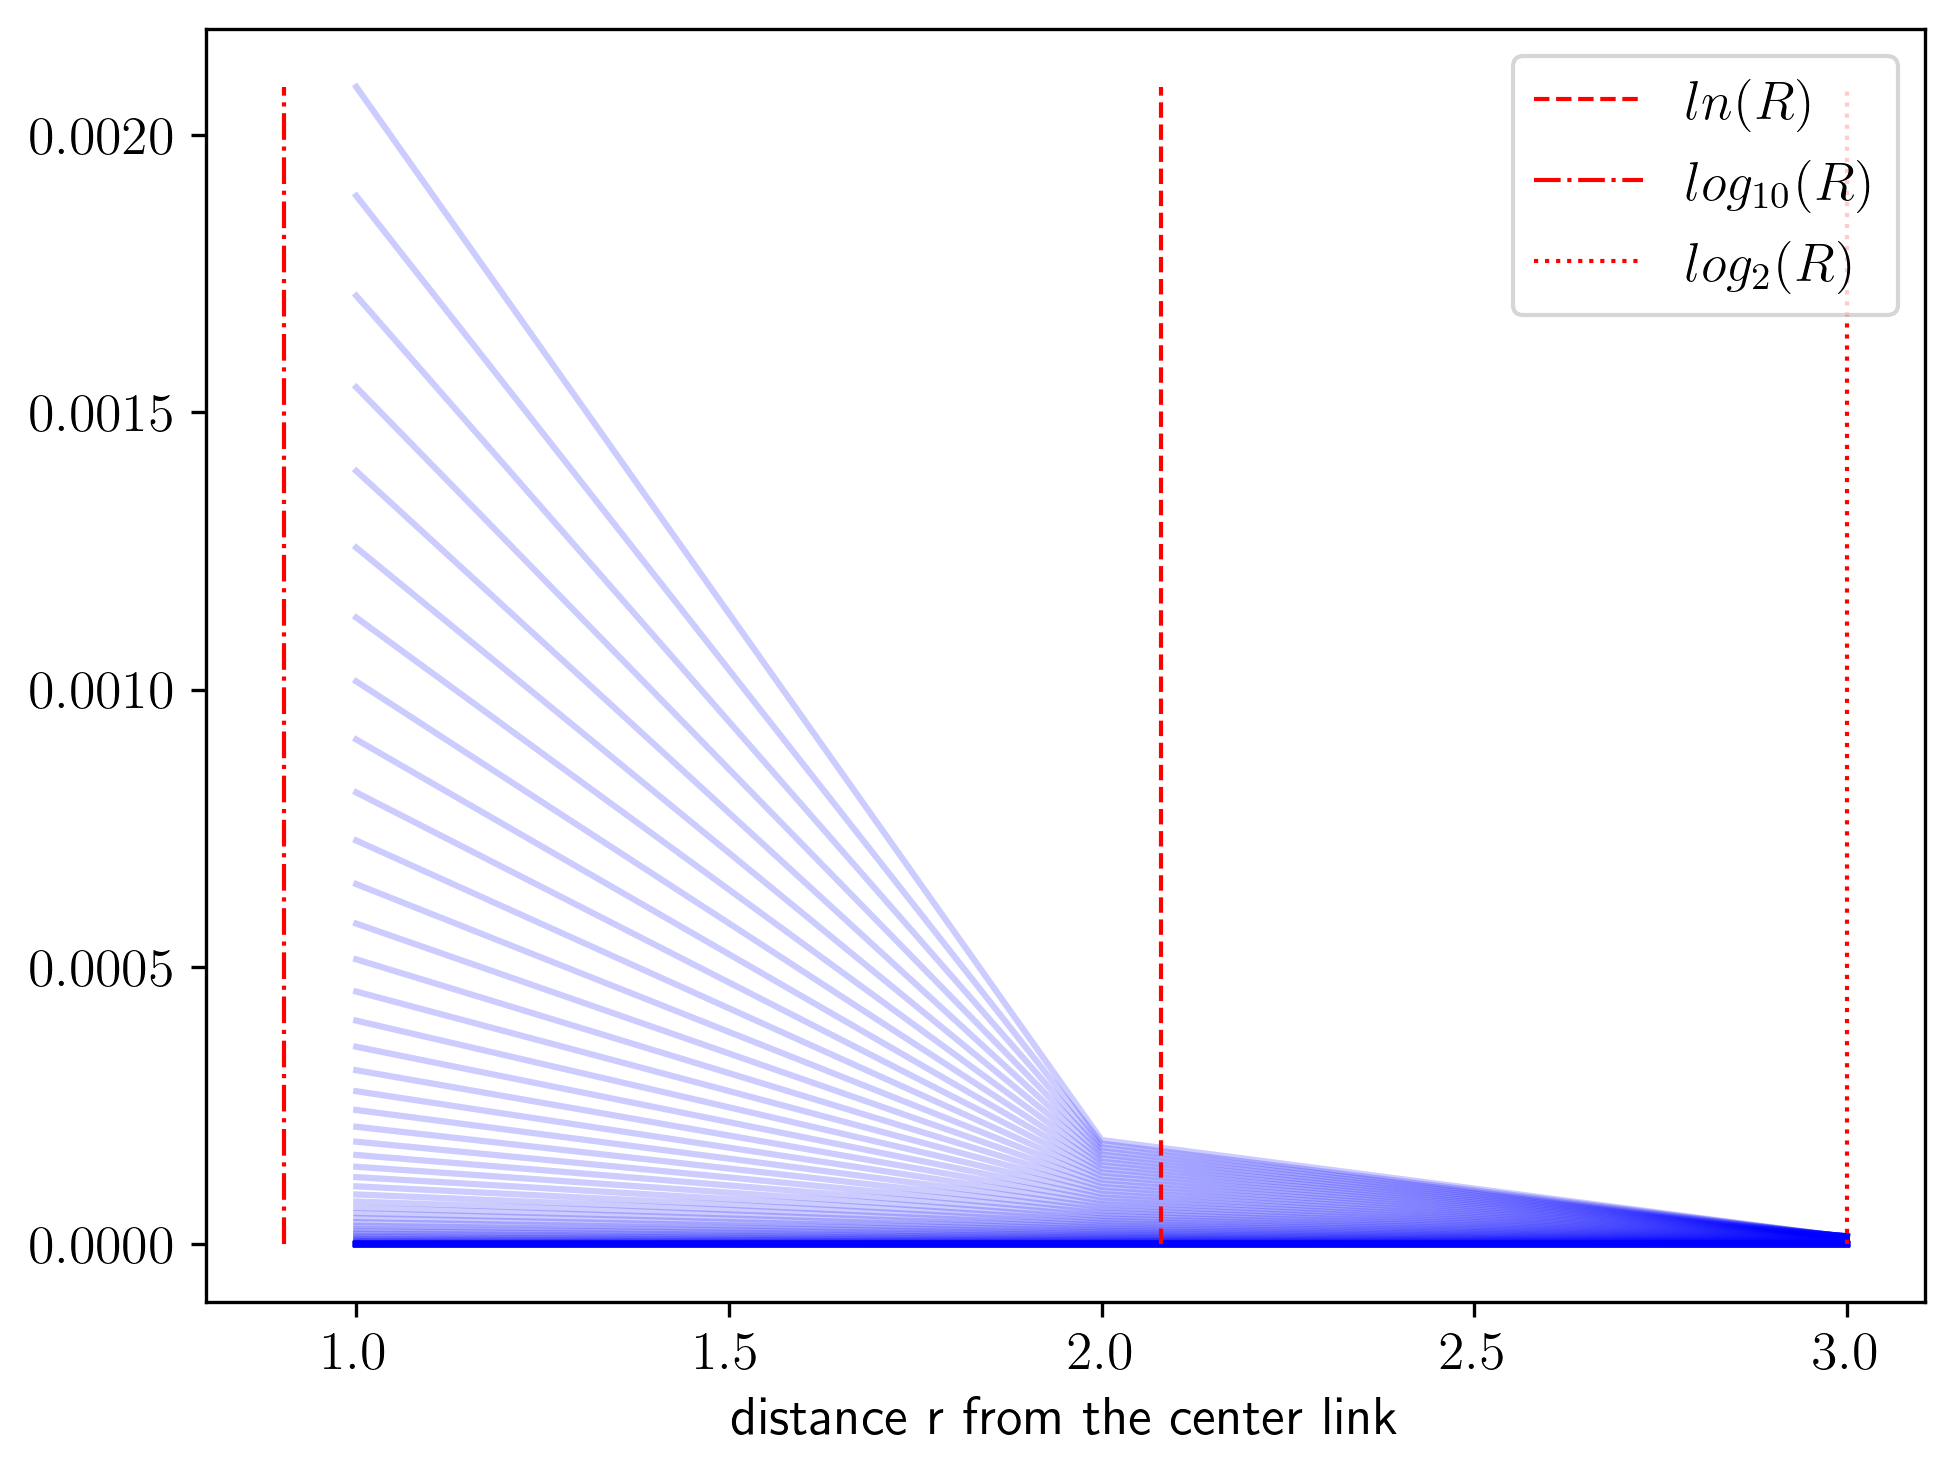

In [26]:
# energy density decay
for half_e in half_eed:
    plt.plot(range(1,l//2+1), half_e[::-1], alpha=0.2, color='blue')
plt.vlines(x=np.log(L_string), ymin=np.min(half_eed), ymax=np.max(half_eed), linestyle='--', linewidth=1, color='r', label='$ln(R)$')
plt.vlines(x=np.log10(L_string), ymin=np.min(half_eed), ymax=np.max(half_eed), linestyle='-.', linewidth=1, color='r', label='$log_{10}(R)$')
plt.vlines(x=np.log2(L_string), ymin=np.min(half_eed), ymax=np.max(half_eed), linestyle=':', linewidth=1, color='r', label='$log_{2}(R)$')
plt.legend()
# plt.yscale('log')
plt.xlabel('distance r from the center link')
plt.show()

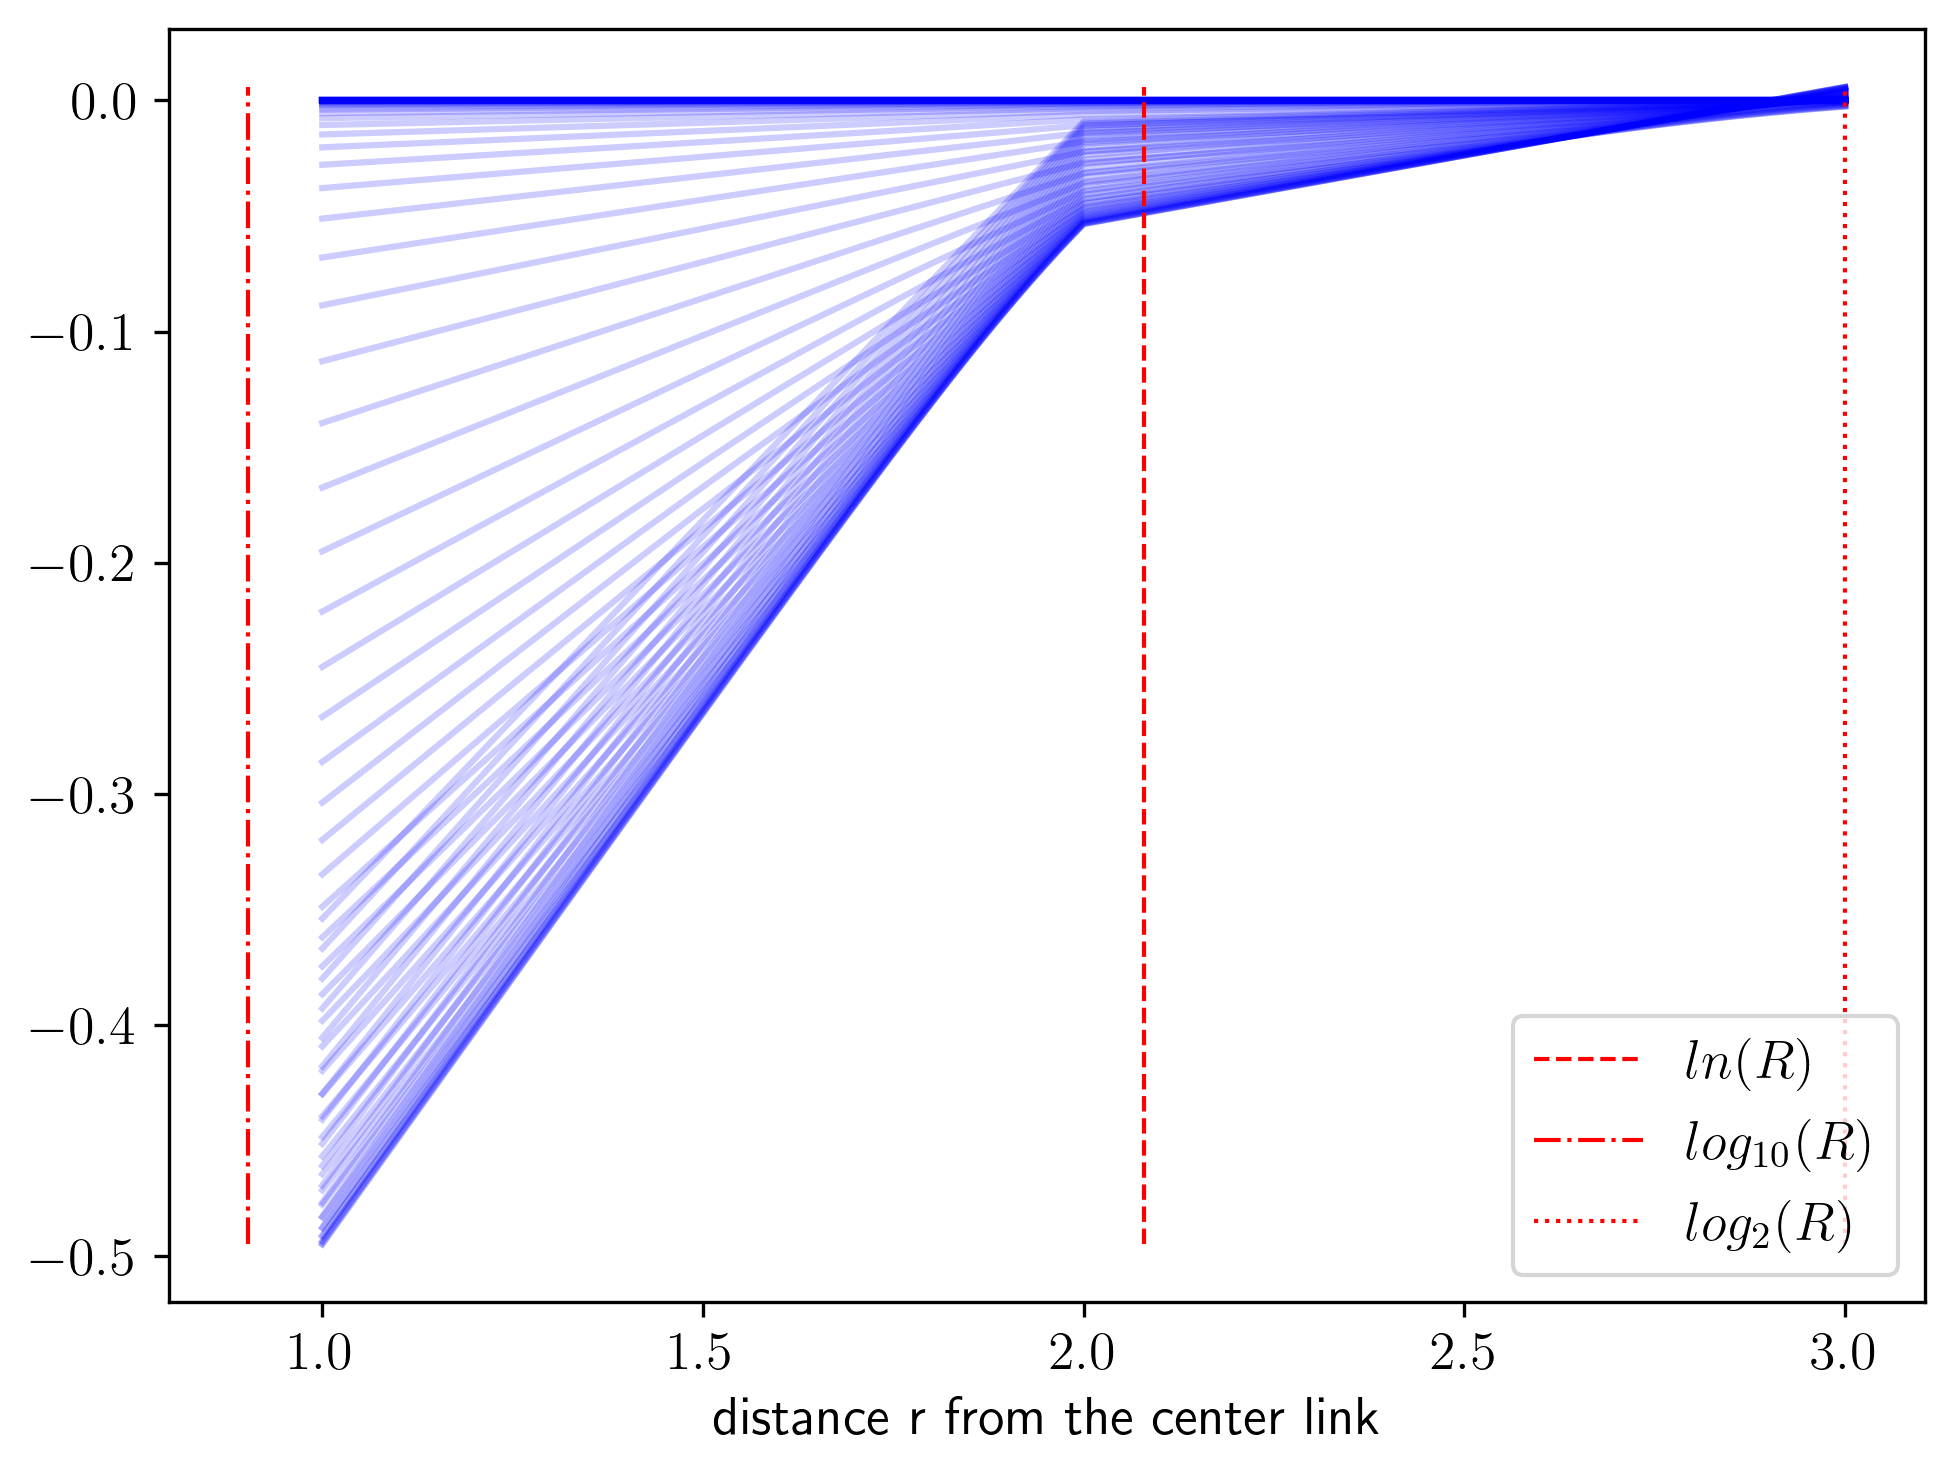

In [25]:
# correlator decay
for half_c in half_corr:
    plt.plot(range(1,l//2+1), half_c[::-1], alpha=0.2, color='blue')
plt.vlines(x=np.log(L_string), ymin=np.min(half_corr), ymax=np.max(half_corr), linestyle='--', linewidth=1, color='r', label='$ln(R)$')
plt.vlines(x=np.log10(L_string), ymin=np.min(half_corr), ymax=np.max(half_corr), linestyle='-.', linewidth=1, color='r', label='$log_{10}(R)$')
plt.vlines(x=np.log2(L_string), ymin=np.min(half_corr), ymax=np.max(half_corr), linestyle=':', linewidth=1, color='r', label='$log_{2}(R)$')
plt.legend()
# plt.yscale('log')
plt.xlabel('distance r from the center link')
plt.show()

In [45]:
np.linspace(0.5,1.5,201)

array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995, 1.   , 1.005, 1.01 , 1.015, 1.02 , 1.025, 1.03 , 1.035,
       1.04 , 1.045, 1.05 , 1.055, 1.06 , 1.065, 1.07 , 1.075, 1.08 ,
       1.085, 1.09 , 1.095, 1.1  , 1.105, 1.11 , 1.115, 1.12 , 1.125,
       1.13 , 1.135,

## Check the String Width $\sigma$ $vs$ the $log(R)$

In [4]:
L, l, hx_i, hx_f, npoints, chi = 20, 6, 0.5, 1.5, 50, 16
cxs = [[2,18],[3,17],[4,16],[5,15],[6,14]]
# cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]

# L, l, hx_i, hx_f, npoints, chi = 41, 6, 0.5, 1.5, 50, 64
# cxs = [[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
cxs.reverse()

lin, log, retrieve = True, False, False
if log:
    interval = np.logspace(hx_i, hx_f, npoints)
    precision = int(np.max((np.abs(hx_i),np.abs(hx_f))))
elif lin:
    interval = np.linspace(hx_i, hx_f, npoints)
    num = (hx_f - hx_i) / npoints
    precision = get_precision(num)

In [ ]:
eed_conn_strings = []
for cx in cxs:
    print(f"computing for R: {np.abs(cx[0]-cx[1])}")
    if endens:
        # compute the connected electric energy density
        eed_charges = compute_electric_energy_density_charges()
        eed_vacuum = compute_electric_energy_density_vacuum()
        eed_conn_r = (np.array(eed_charges) - np.array(eed_vacuum))
    eed_conn_strings.append(eed_conn_r)

In [ ]:
# we find the string width as a normalized sum of the electric energy density for the position squared
eed_strings = []
for eed_conn in eed_conn_strings:   
    eed_string = []
    xs = [i for i in range(-l//2,l//2+1,) if i!=0]
    for eed_lad in eed_conn:
        eed_sum_lad = 0
        for x, eed_x in zip(xs, eed_lad):
            eed_sum_lad += eed_x * ((x)**2)
        eed_sum_lad = eed_sum_lad / sum(eed_lad)
        eed_string.append(eed_sum_lad)
    eed_strings.append(eed_string)

In [ ]:
h_i = 0.5
h_f = 0.7
npoints = 101
interval = np.linspace(h_i,h_f,npoints)
Rs = [int(cx[1]-cx[0]) for cx in cxs]
colors = create_sequential_colors(npoints, colormap_name='seismic')
for g in interval:
    sigma_g = eed_strings[:, g]
    plt.plot(np.log(Rs), sigma_g)
plt.show()

In [24]:
L, l, chi, h_i, h_f, npoints = 4, 4, 16, 0.1, 1.0, 10
cx = [0,4]
cxs = [[0,4],[1,3]]
cy = [2,2]

# L, l, h_i, h_f, npoints, chi = 20, 6, 0.5, 1.5, 50, 16
# cxs = [[2,18],[3,17],[4,16],[5,15],[6,14]]
# cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]

# L, l, hx_i, hx_f, npoints, chi = 41, 6, 0.5, 1.5, 50, 64
# cxs = [[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# cy = [3,3]

cxs.reverse()
Rs = [np.abs(cx[0]-cx[1]) for cx in cxs]
interval = np.linspace(h_i, h_f, npoints)
precision = get_precision((h_f-h_i)/npoints)

In [25]:
def compute_electric_energy_density_vacuum(energy_contribution: str):
    eed_vacuum = []
    for h in interval:
        print(f"Energy Density - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        if energy_contribution == "t":
            eed = lattice_mps.mpo_Z2_column_total_energy_density(site=L//2)
        elif energy_contribution == "e":
            eed = lattice_mps.mpo_Z2_column_electric_energy_density(site=L//2)
        elif energy_contribution == "m":
            eed = lattice_mps.mpo_Z2_column_magnetic_energy_density(site=L//2)
        eed_vacuum.append(eed)
    return eed_vacuum

def compute_electric_energy_density_charges(energy_contribution: str, cx: list, cy: list):
    eed_charges = []
    for h in interval:
        print(f"Energy Density - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=cx, cy=cy)
        lattice_mps.Z2.add_charges(rows=cx, columns=cy)
        if energy_contribution == "t":
            eed = lattice_mps.mpo_Z2_column_total_energy_density(site=L//2)
        elif energy_contribution == "e":
            eed = lattice_mps.mpo_Z2_column_electric_energy_density(site=L//2)
        elif energy_contribution == "m":
            eed = lattice_mps.mpo_Z2_column_magnetic_energy_density(site=L//2)
        eed_charges.append(eed)
    return eed_charges

In [26]:
energy_contribution = "e"
compute_electric_energy_density_charges(energy_contribution=energy_contribution, cx=cx, cy=cy)

Energy Density - charges for h: 0.1
Energy Density - charges for h: 0.2
Energy Density - charges for h: 0.30000000000000004
Energy Density - charges for h: 0.4
Energy Density - charges for h: 0.5
Energy Density - charges for h: 0.6
Energy Density - charges for h: 0.7000000000000001
Energy Density - charges for h: 0.8
Energy Density - charges for h: 0.9
Energy Density - charges for h: 1.0


[[array(-0.00179611),
  array(-0.00100032),
  array(-0.00100032),
  array(-0.00179611)],
 [array(-0.01558449),
  array(-0.00804357),
  array(-0.00804357),
  array(-0.01558449)],
 [array(-0.06065417),
  array(-0.02779472),
  array(-0.02779473),
  array(-0.06065417)],
 [array(-0.17499258),
  array(-0.0701187),
  array(-0.07011863),
  array(-0.17499252)],
 [array(-0.41461272),
  array(-0.15009888),
  array(-0.15009842),
  array(-0.41461255)],
 [array(-0.78389405),
  array(-0.26979294),
  array(-0.26979348),
  array(-0.78389392)],
 [array(-1.19886934),
  array(-0.40376846),
  array(-0.40376816),
  array(-1.19886927)],
 [array(-1.59835583),
  array(-0.53854895),
  array(-0.53855118),
  array(-1.59835583)],
 [array(-1.96588678),
  array(-0.67755437),
  array(-0.67755437),
  array(-1.96588685)],
 [array(-2.2992887),
  array(-0.81897757),
  array(-0.81897768),
  array(-2.29928865)]]

computing for R: 2
Energy Density - charges for h: 0.1
Energy Density - charges for h: 0.2
Energy Density - charges for h: 0.30000000000000004
Energy Density - charges for h: 0.4
Energy Density - charges for h: 0.5
Energy Density - charges for h: 0.6
Energy Density - charges for h: 0.7000000000000001
Energy Density - charges for h: 0.8
Energy Density - charges for h: 0.9
Energy Density - charges for h: 1.0
Energy Density - vacuum for h: 0.1
Energy Density - vacuum for h: 0.2
Energy Density - vacuum for h: 0.30000000000000004
Energy Density - vacuum for h: 0.4
Energy Density - vacuum for h: 0.5
Energy Density - vacuum for h: 0.6
Energy Density - vacuum for h: 0.7000000000000001
Energy Density - vacuum for h: 0.8
Energy Density - vacuum for h: 0.9
Energy Density - vacuum for h: 1.0
computing for R: 4
Energy Density - charges for h: 0.1
Energy Density - charges for h: 0.2
Energy Density - charges for h: 0.30000000000000004
Energy Density - charges for h: 0.4
Energy Density - charges for h

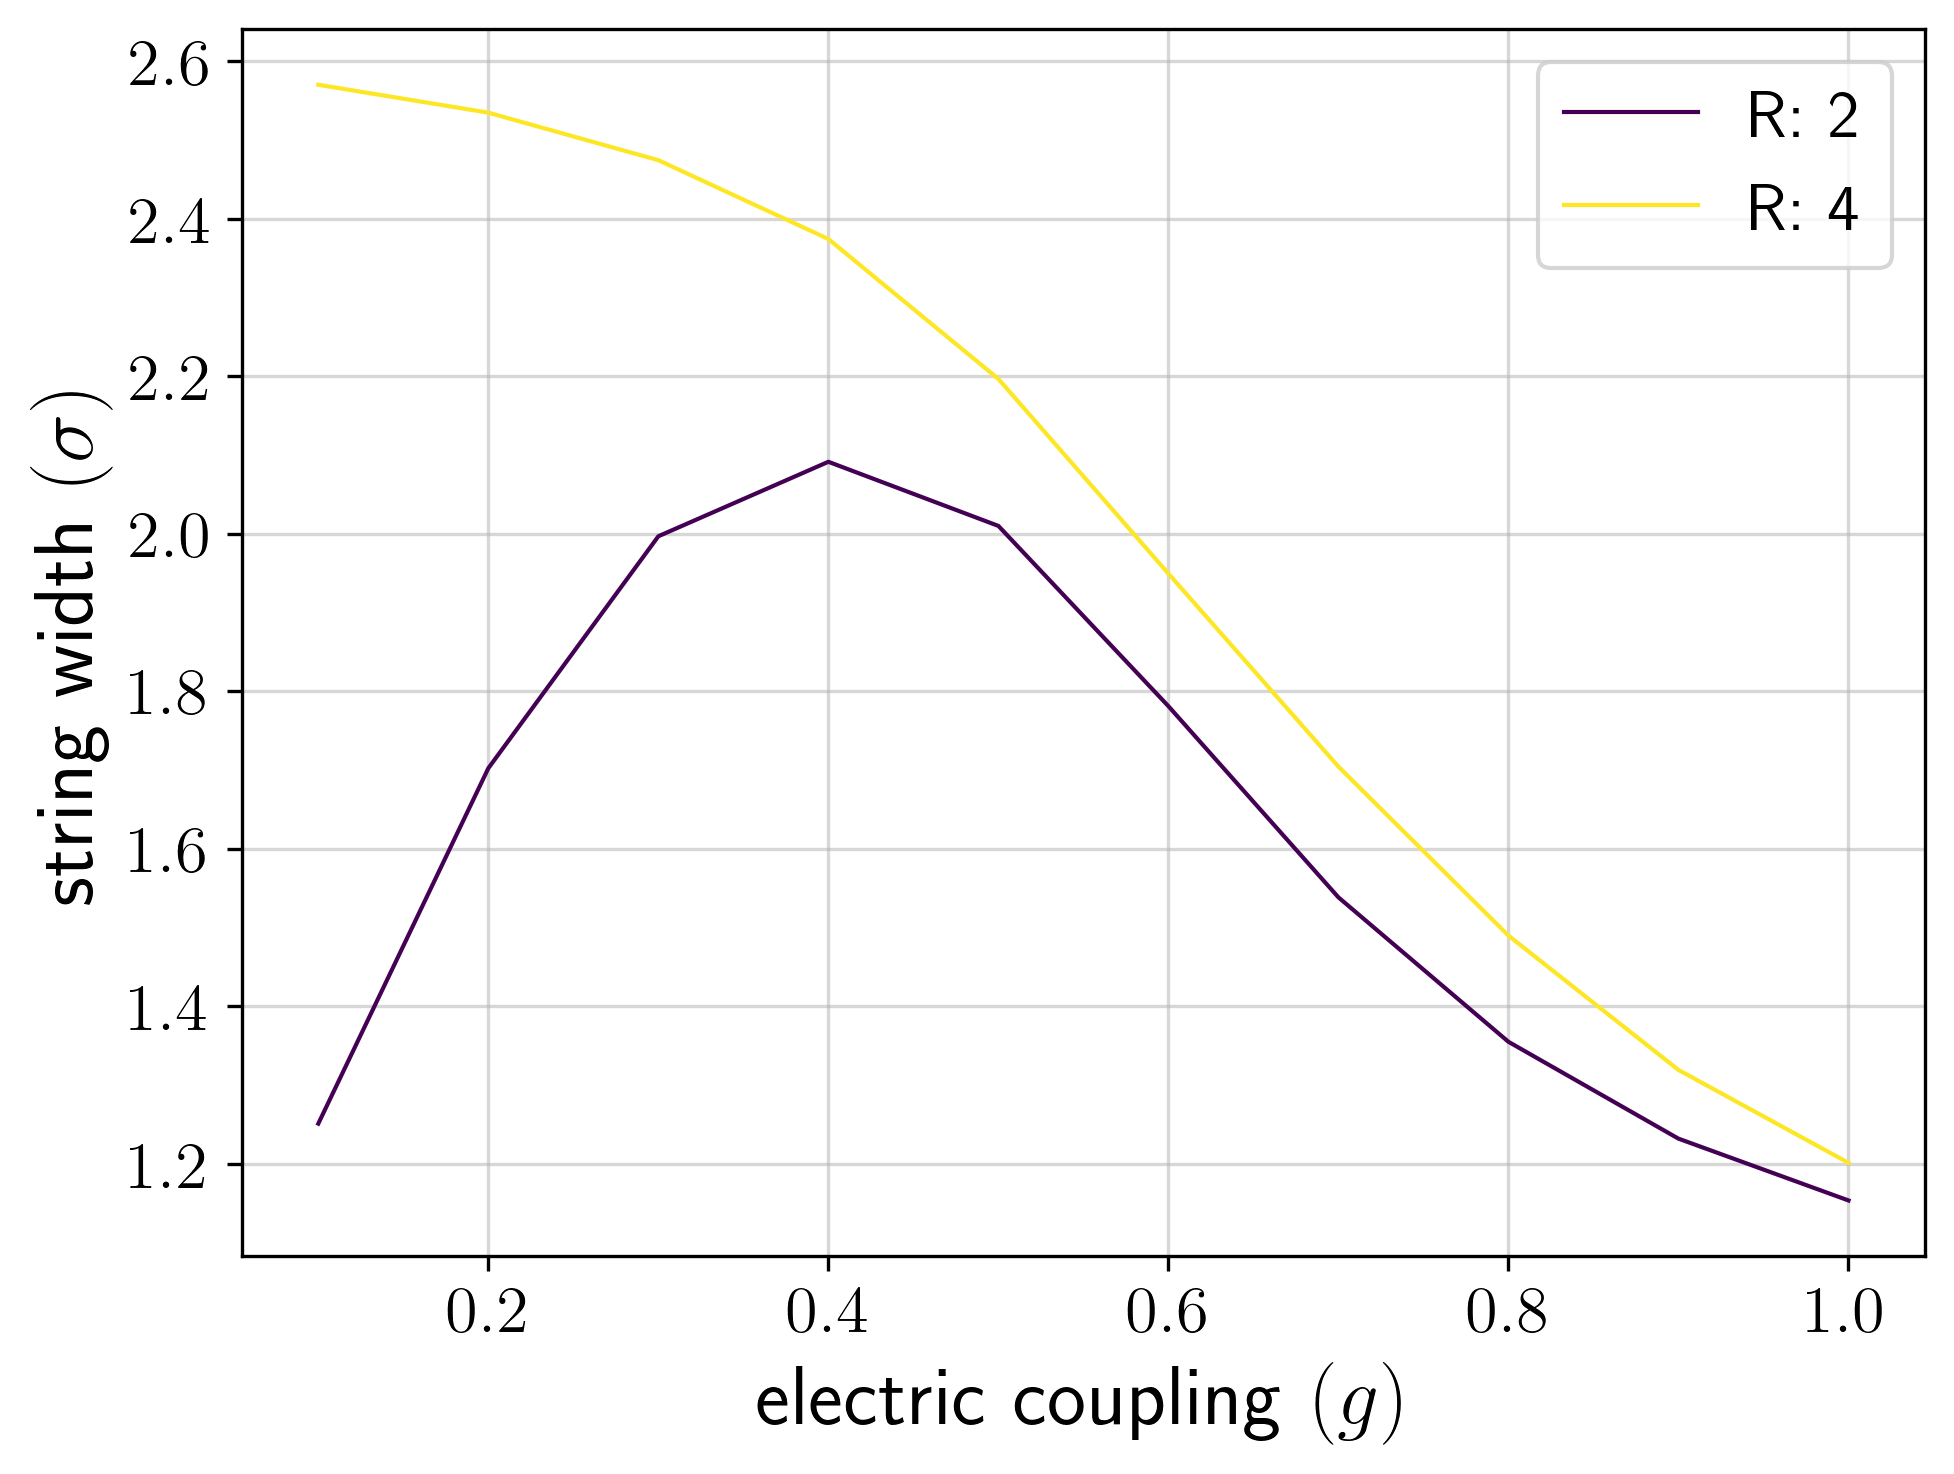

In [28]:
energy_contribution = "e"
eed_conn_strings = []
for cx in cxs:
    print(f"computing for R: {np.abs(cx[0]-cx[1])}")
    if endens:
        # compute the connected electric energy density
        eed_charges = compute_electric_energy_density_charges(energy_contribution=energy_contribution, cx=cx, cy=cy)
        eed_vacuum = compute_electric_energy_density_vacuum(energy_contribution=energy_contribution)
        eed_conn_r = (np.array(eed_charges) - np.array(eed_vacuum))
    eed_conn_strings.append(eed_conn_r)

# we find the string width as a normalized sum of the electric energy density for the position squared
eed_strings = []
colors = create_sequential_colors(len(Rs))
for k, eed_conn in enumerate(eed_conn_strings):
    eed_string = []
    xs = [i for i in range(-l//2,l//2+1,) if i!=0]
    for eed_lad in eed_conn:
        eed_sum_lad = 0
        for x, eed_x in zip(xs, eed_lad):
            eed_sum_lad += eed_x * ((x)**2)
        eed_sum_lad = eed_sum_lad / sum(eed_lad)
        eed_string.append(eed_sum_lad)
    plt.plot(interval, eed_string, color=colors[k], linewidth=1, label=f"R: {Rs[k]}")
    eed_strings.append(eed_string)
plt.xlabel("electric coupling $(g)$", fontsize=20)
plt.ylabel("string width $(\sigma)$", fontsize=20)
plt.tick_params(axis="both", labelsize=16)
plt.legend(fontsize=16)
plt.grid(True, alpha=0.5)
plt.savefig(f"{parent_path}/figures/fluxtube/string_width_different_Rs_{int(cxs[-1][1]-cxs[-1][0])}-{int(cxs[0][1]-cxs[0][0])}_{model}_direct_lattice_{l}x{L}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.png")

### Energetic contributions to string thickness $\sigma$

computing for R: 2
Energy Density - charges for h: 0.1
Energy Density - charges for h: 0.2
Energy Density - charges for h: 0.30000000000000004
Energy Density - charges for h: 0.4
Energy Density - charges for h: 0.5
Energy Density - charges for h: 0.6
Energy Density - charges for h: 0.7000000000000001
Energy Density - charges for h: 0.8
Energy Density - charges for h: 0.9
Energy Density - charges for h: 1.0
Energy Density - vacuum for h: 0.1
Energy Density - vacuum for h: 0.2
Energy Density - vacuum for h: 0.30000000000000004
Energy Density - vacuum for h: 0.4
Energy Density - vacuum for h: 0.5
Energy Density - vacuum for h: 0.6
Energy Density - vacuum for h: 0.7000000000000001
Energy Density - vacuum for h: 0.8
Energy Density - vacuum for h: 0.9
Energy Density - vacuum for h: 1.0
computing for R: 2
Energy Density - charges for h: 0.1
Energy Density - charges for h: 0.2
Energy Density - charges for h: 0.30000000000000004
Energy Density - charges for h: 0.4
Energy Density - charges for h

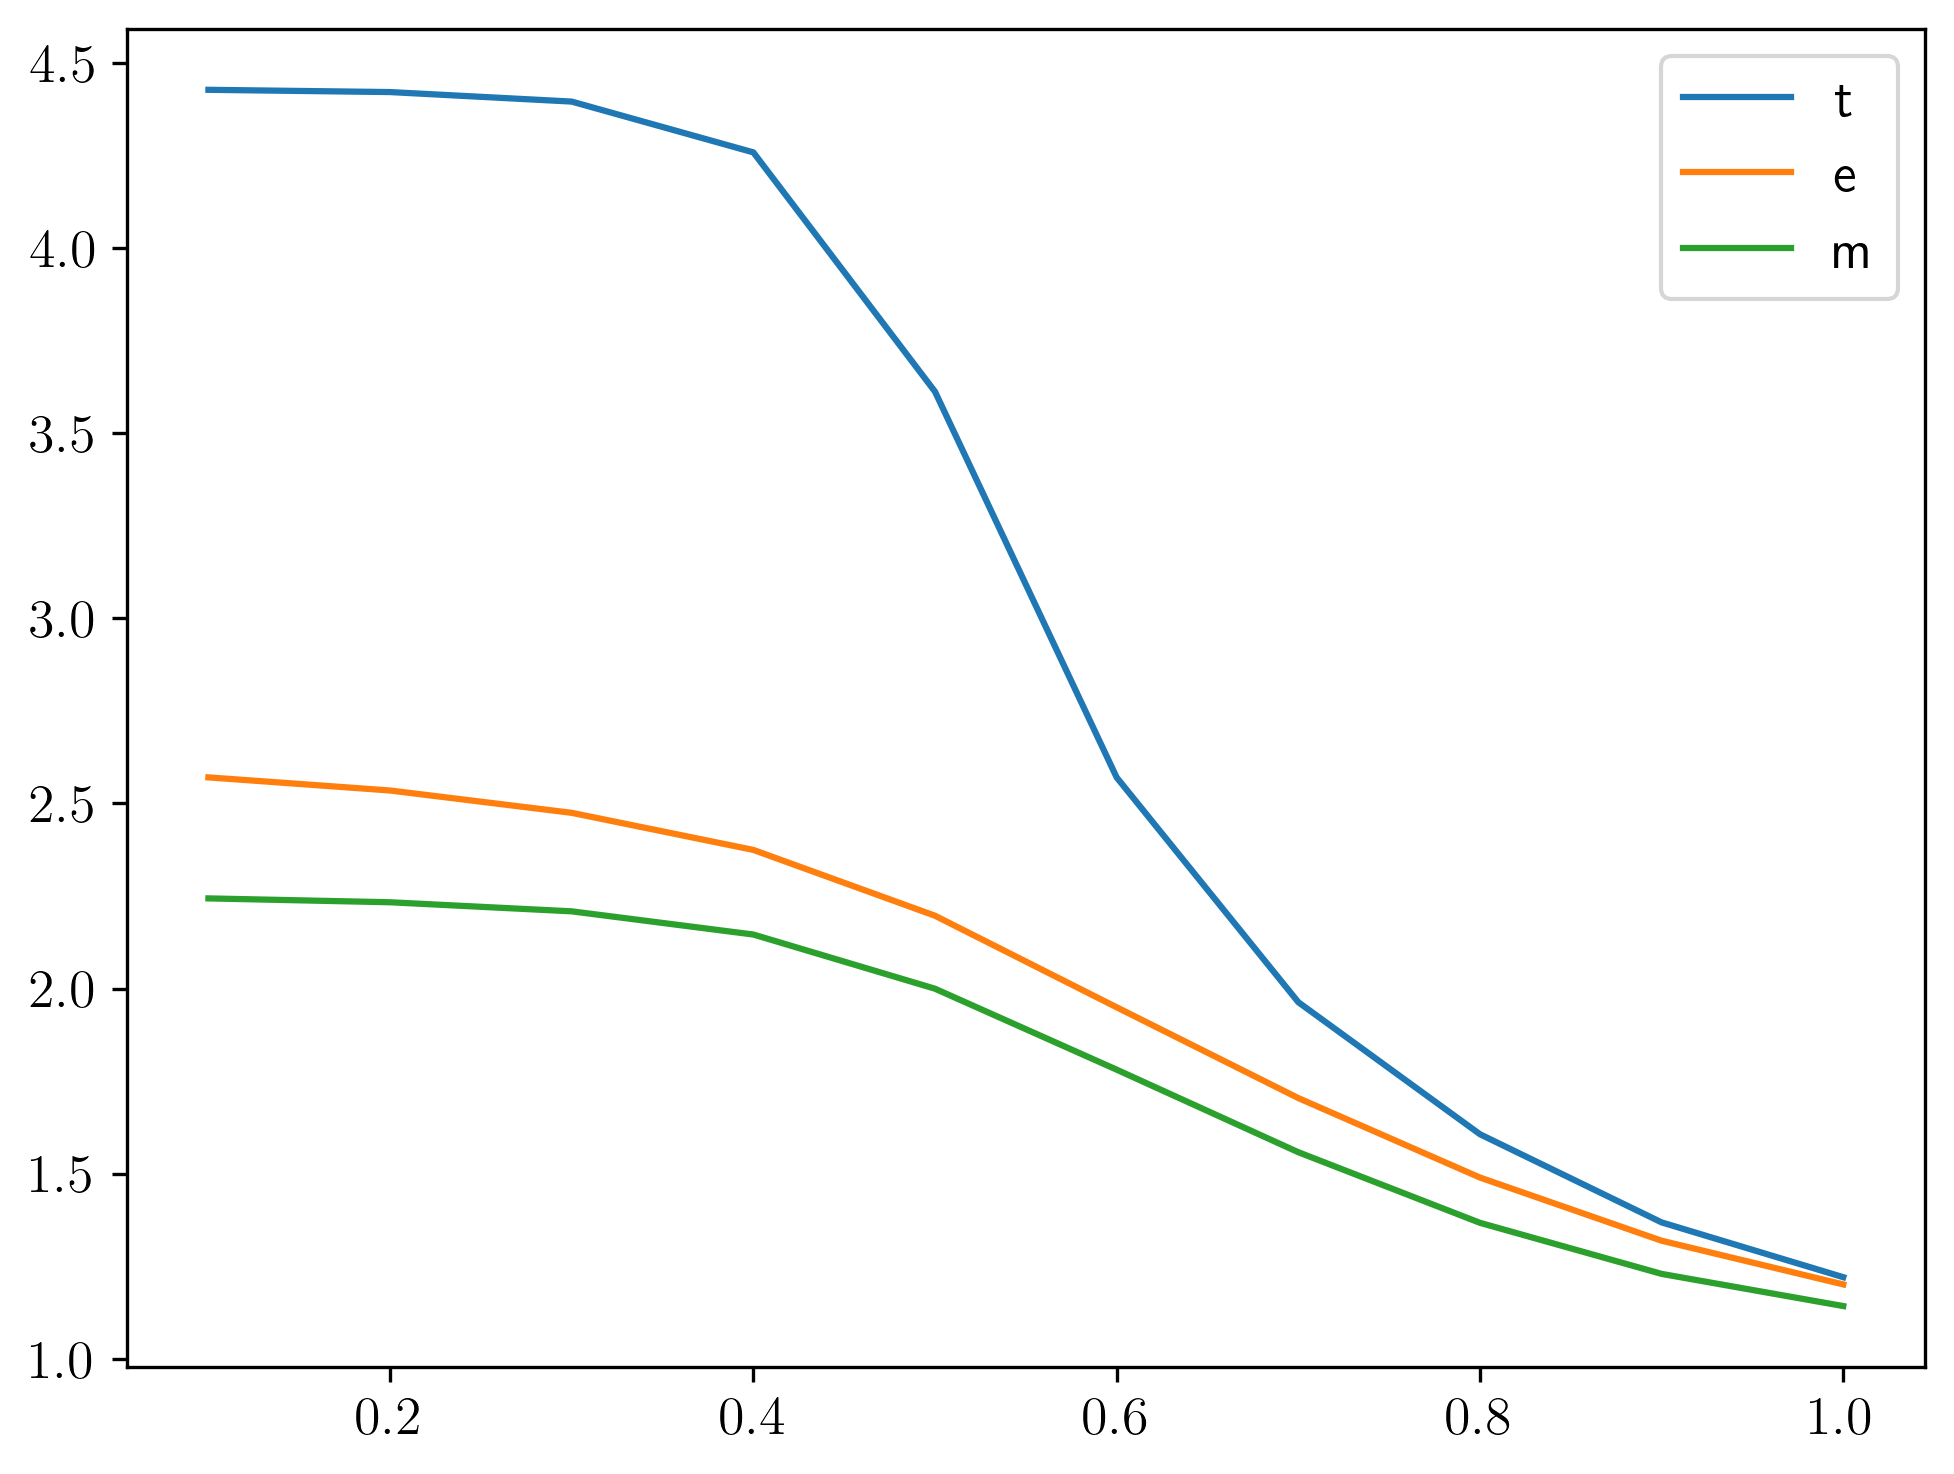

In [32]:
energy_contributions = ["t","e","m"]
eed_conn_ham_type = []
cx = cxs[1]
for energy_contribution in energy_contributions:
    print(f"computing for R: {np.abs(cxs[0][0]-cxs[0][1])}")
    if endens:
        # compute the connected electric energy density
        eed_charges = compute_electric_energy_density_charges(energy_contribution=energy_contribution, cx=cx, cy=cy)
        eed_vacuum = compute_electric_energy_density_vacuum(energy_contribution=energy_contribution)
        eed_conn_r = (np.array(eed_charges) - np.array(eed_vacuum))
    eed_conn_ham_type.append(eed_conn_r)

# we find the string width as a normalized sum of the electric energy density for the position squared
eed_hams = []
for k, eed_conn in enumerate(eed_conn_ham_type):   
    eed_ham = []
    xs = [i for i in range(-l//2,l//2+1,) if i!=0]
    for eed_lad in eed_conn:
        eed_sum_lad = 0
        for x, eed_x in zip(xs, eed_lad):
            eed_sum_lad += eed_x * ((x)**2)
        eed_sum_lad = eed_sum_lad / sum(eed_lad)
        eed_ham.append(eed_sum_lad)
    plt.plot(interval, eed_ham, label=f"{energy_contributions[k]}")
    eed_hams.append(eed_ham)
plt.legend()